<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 3b</b></h3>
<h4><b>Storms dataset</b></h4>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/hurricane.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This datasets contains data about storms and hurricanes in the Atlantic. The data is from 1975 to 2021. Some older data has missing data. The status -column contains the storm classification, the category is based on Saffir-Simpson hurricane category (N/A, 0-5. 5 is most severe).</p>
<p>This dataset is also split into quantiles by pandas.</p>
<p>Original data: <a href="https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html">https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What determines a strong hurricane? This information is of course already in the category -column, but there seems to be two columns that define a strong hurricane. What are these variables, and how they seem to correlate with each other in case of a severe hurricane?</li>
<li>Based on the dataset, when is the most active hurricane season (months) in Atlantic?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too).</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>Based on this dataset, which hurricanes in this dataset seem to be strongest, and what were they called? (use Google). Note that actual statistics might differ from this dataset, since this dataset is only a sample of observations. (tip: in addition to looking at the seaborn plots, you can also inspect the pandas DataFrames)</li>
<li>The strongest hurricanes in the dataset seem to show a certain behavior when it comes to time. When does this happen (clockwise) and can you find an explanation for this by using Google?</li>
<li>This notebook mostly concentrates on the top 25% hurricanes. Can you find something interesting in the other quantiles?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('storms.csv')

# coordinates not needed at this point, remove
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)

# handle missing values, since seaborn (or machine learning) doesn't work with them

# if category is missing, fill with category 0 (least severe)
df['category'] = df['category'].fillna(0)

# if diameters are missing, fill with 0
df['tropicalstorm_force_diameter'] = df['tropicalstorm_force_diameter'].fillna(0)
df['hurricane_force_diameter'] = df['hurricane_force_diameter'].fillna(0)

# whatever is left with missing data, remove it
df = df.dropna()

# day brings too much variance in the dataset, remove it
df = df.drop('day', axis=1)

# finally, reset index and drop the original index
df = df.reset_index()
df = df.drop('index', axis=1)
del df[df.columns[0]]

# group by name of the hurricane as well as wind and pressure
values = df.groupby('name').sum(numeric_only=True).sort_values(by=['wind', 'pressure'], ascending=False)

# split to quantiles
df_highest = list(values.query('wind >= wind.quantile(q=0.94)').index)
df_average_plus = list(values.query('wind >= wind.quantile(q=0.68) and wind < wind.quantile(q=0.94)').index)
df_average_minus = list(values.query('wind >= wind.quantile(q=0.25) and wind < wind.quantile(q=0.68)').index)
df_lowest = list(values.query('wind < wind.quantile(q=0.25)').index)

# create dataframes based on quantile hurricanes
df1 = df[df['name'].isin(df_highest)]
df2 = df[df['name'].isin(df_average_plus)]
df3 = df[df['name'].isin(df_average_minus)]
df4 = df[df['name'].isin(df_lowest)]

# correlation matrices
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

<h4><b>seaborn plots - pairplots</b></h4>

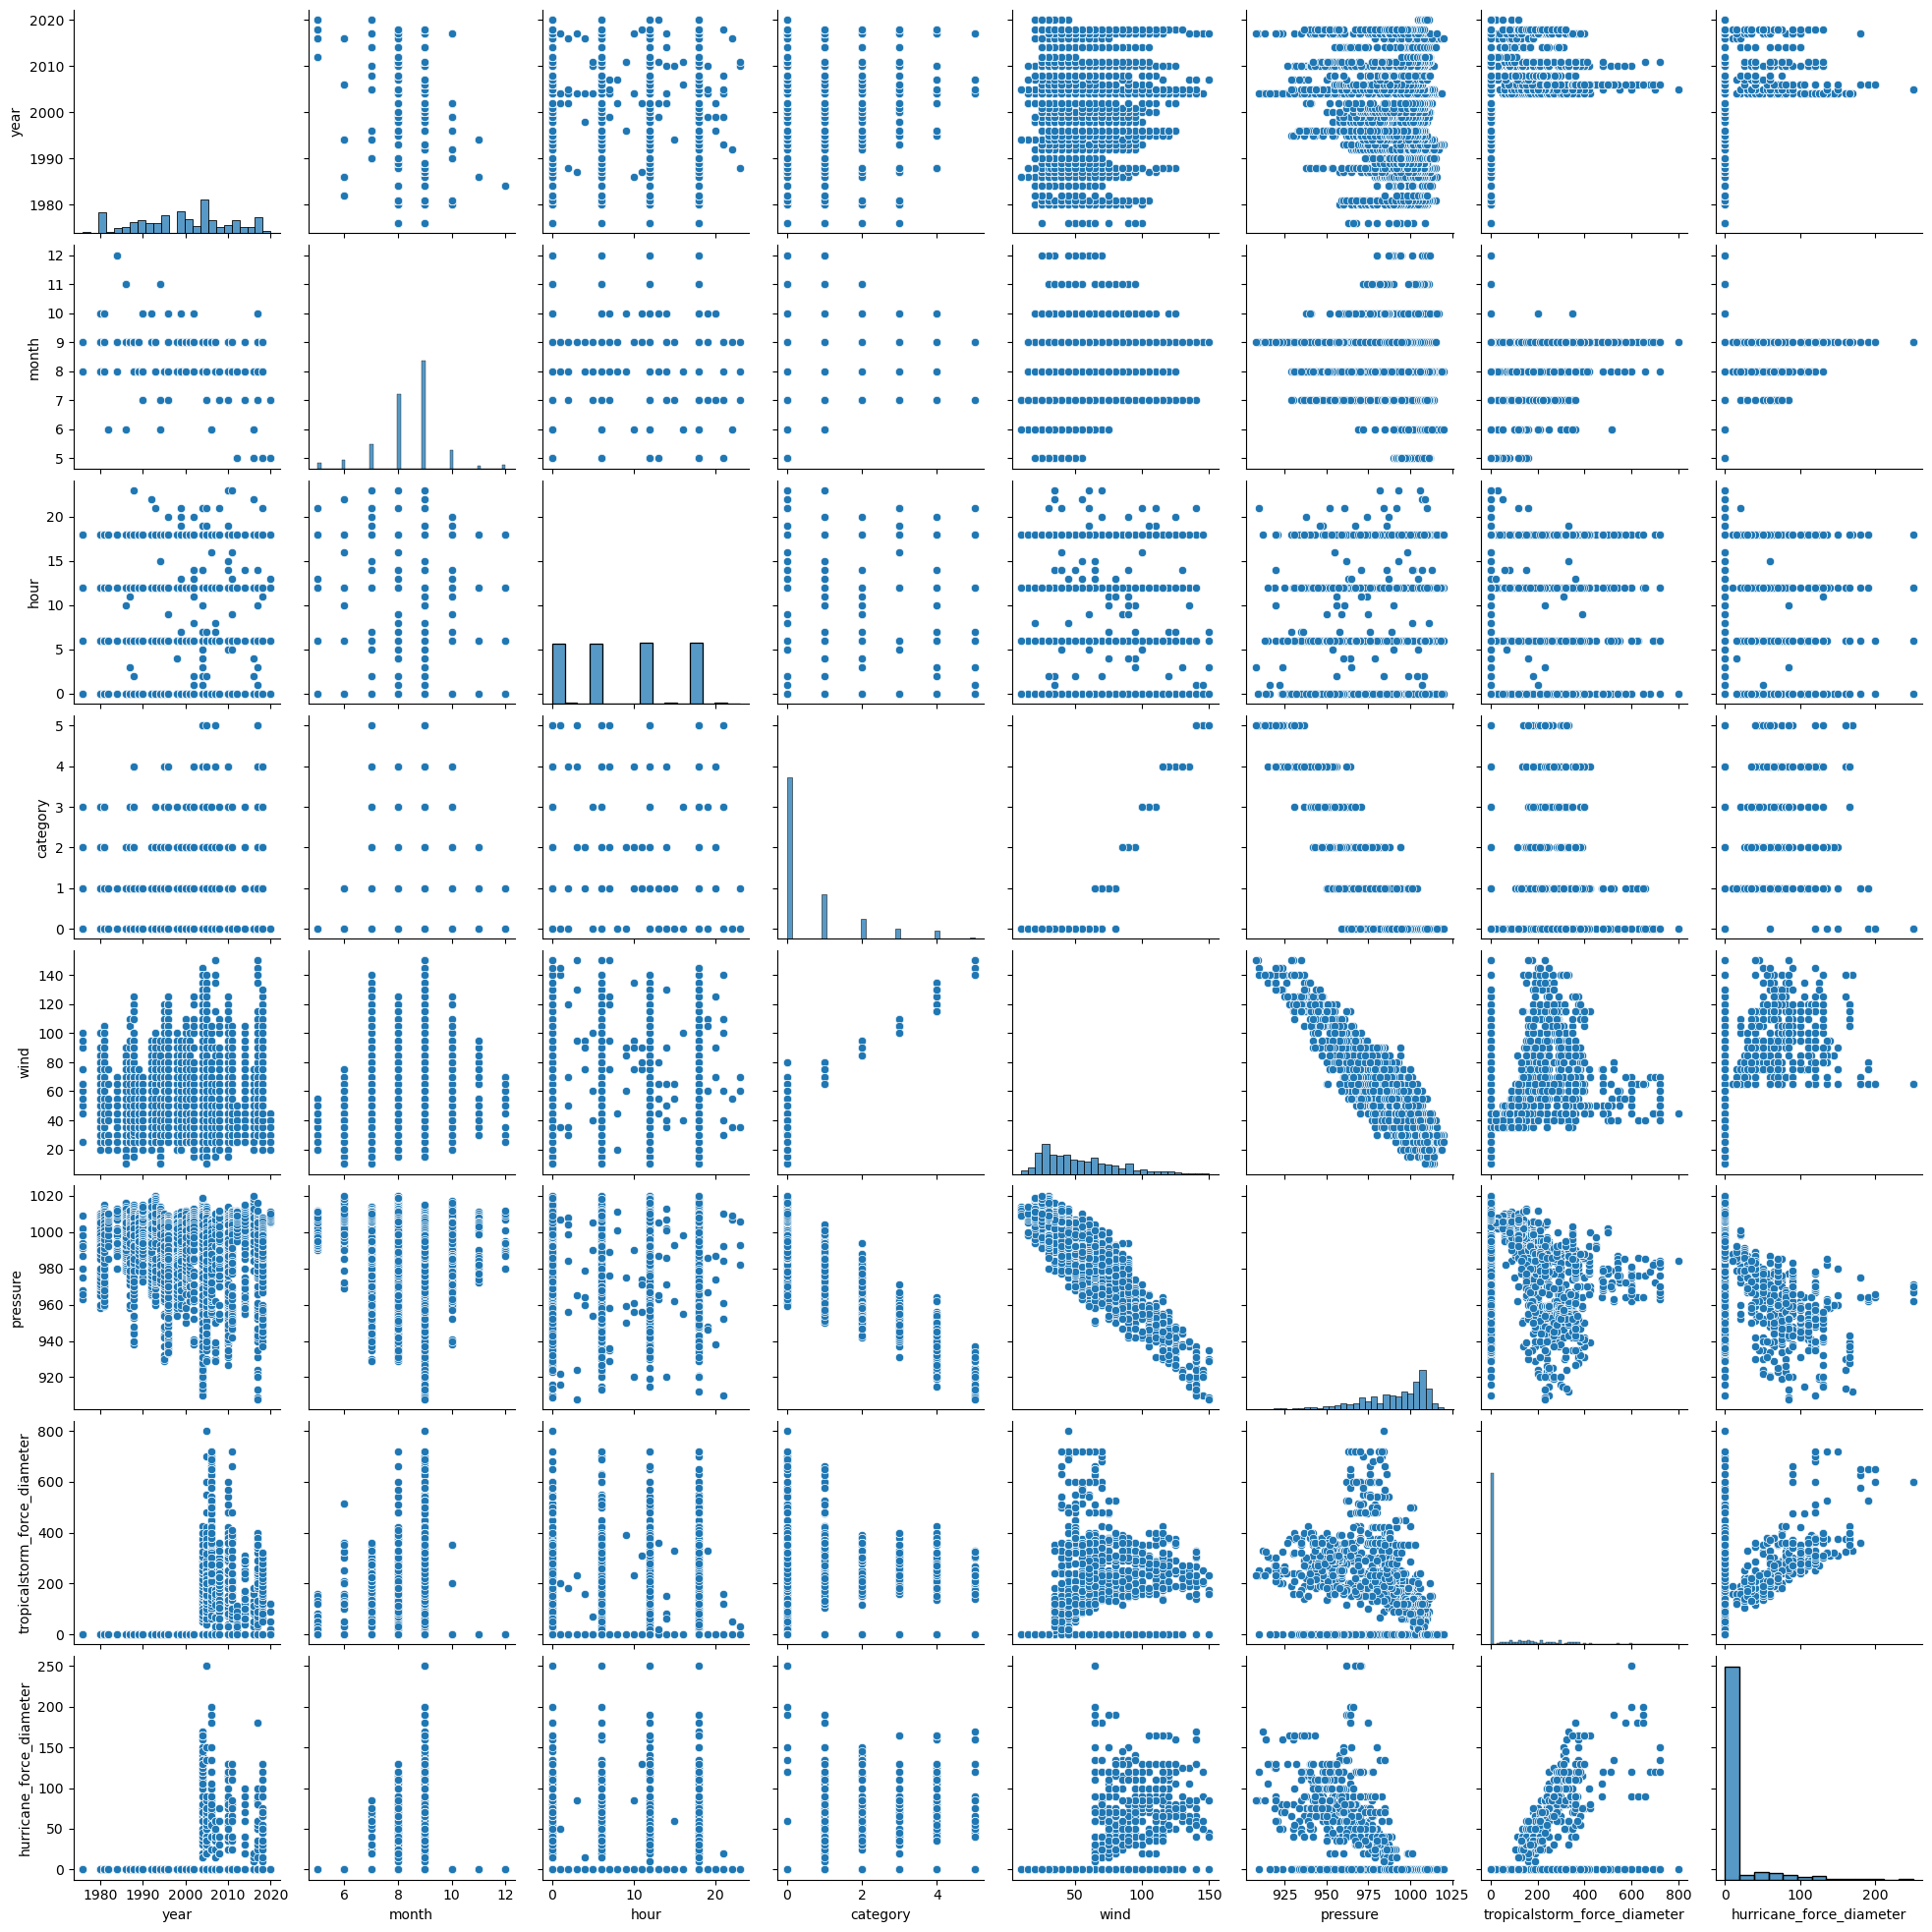

In [3]:
# basic pair plot
sns.pairplot(df1)

# we can see negative correlation: wind - pressure
# probably, positive correlation: hurricane_force_diameter - tropicalstorm_force_diameter
# we need take a look deeper because here pictures are no so clear

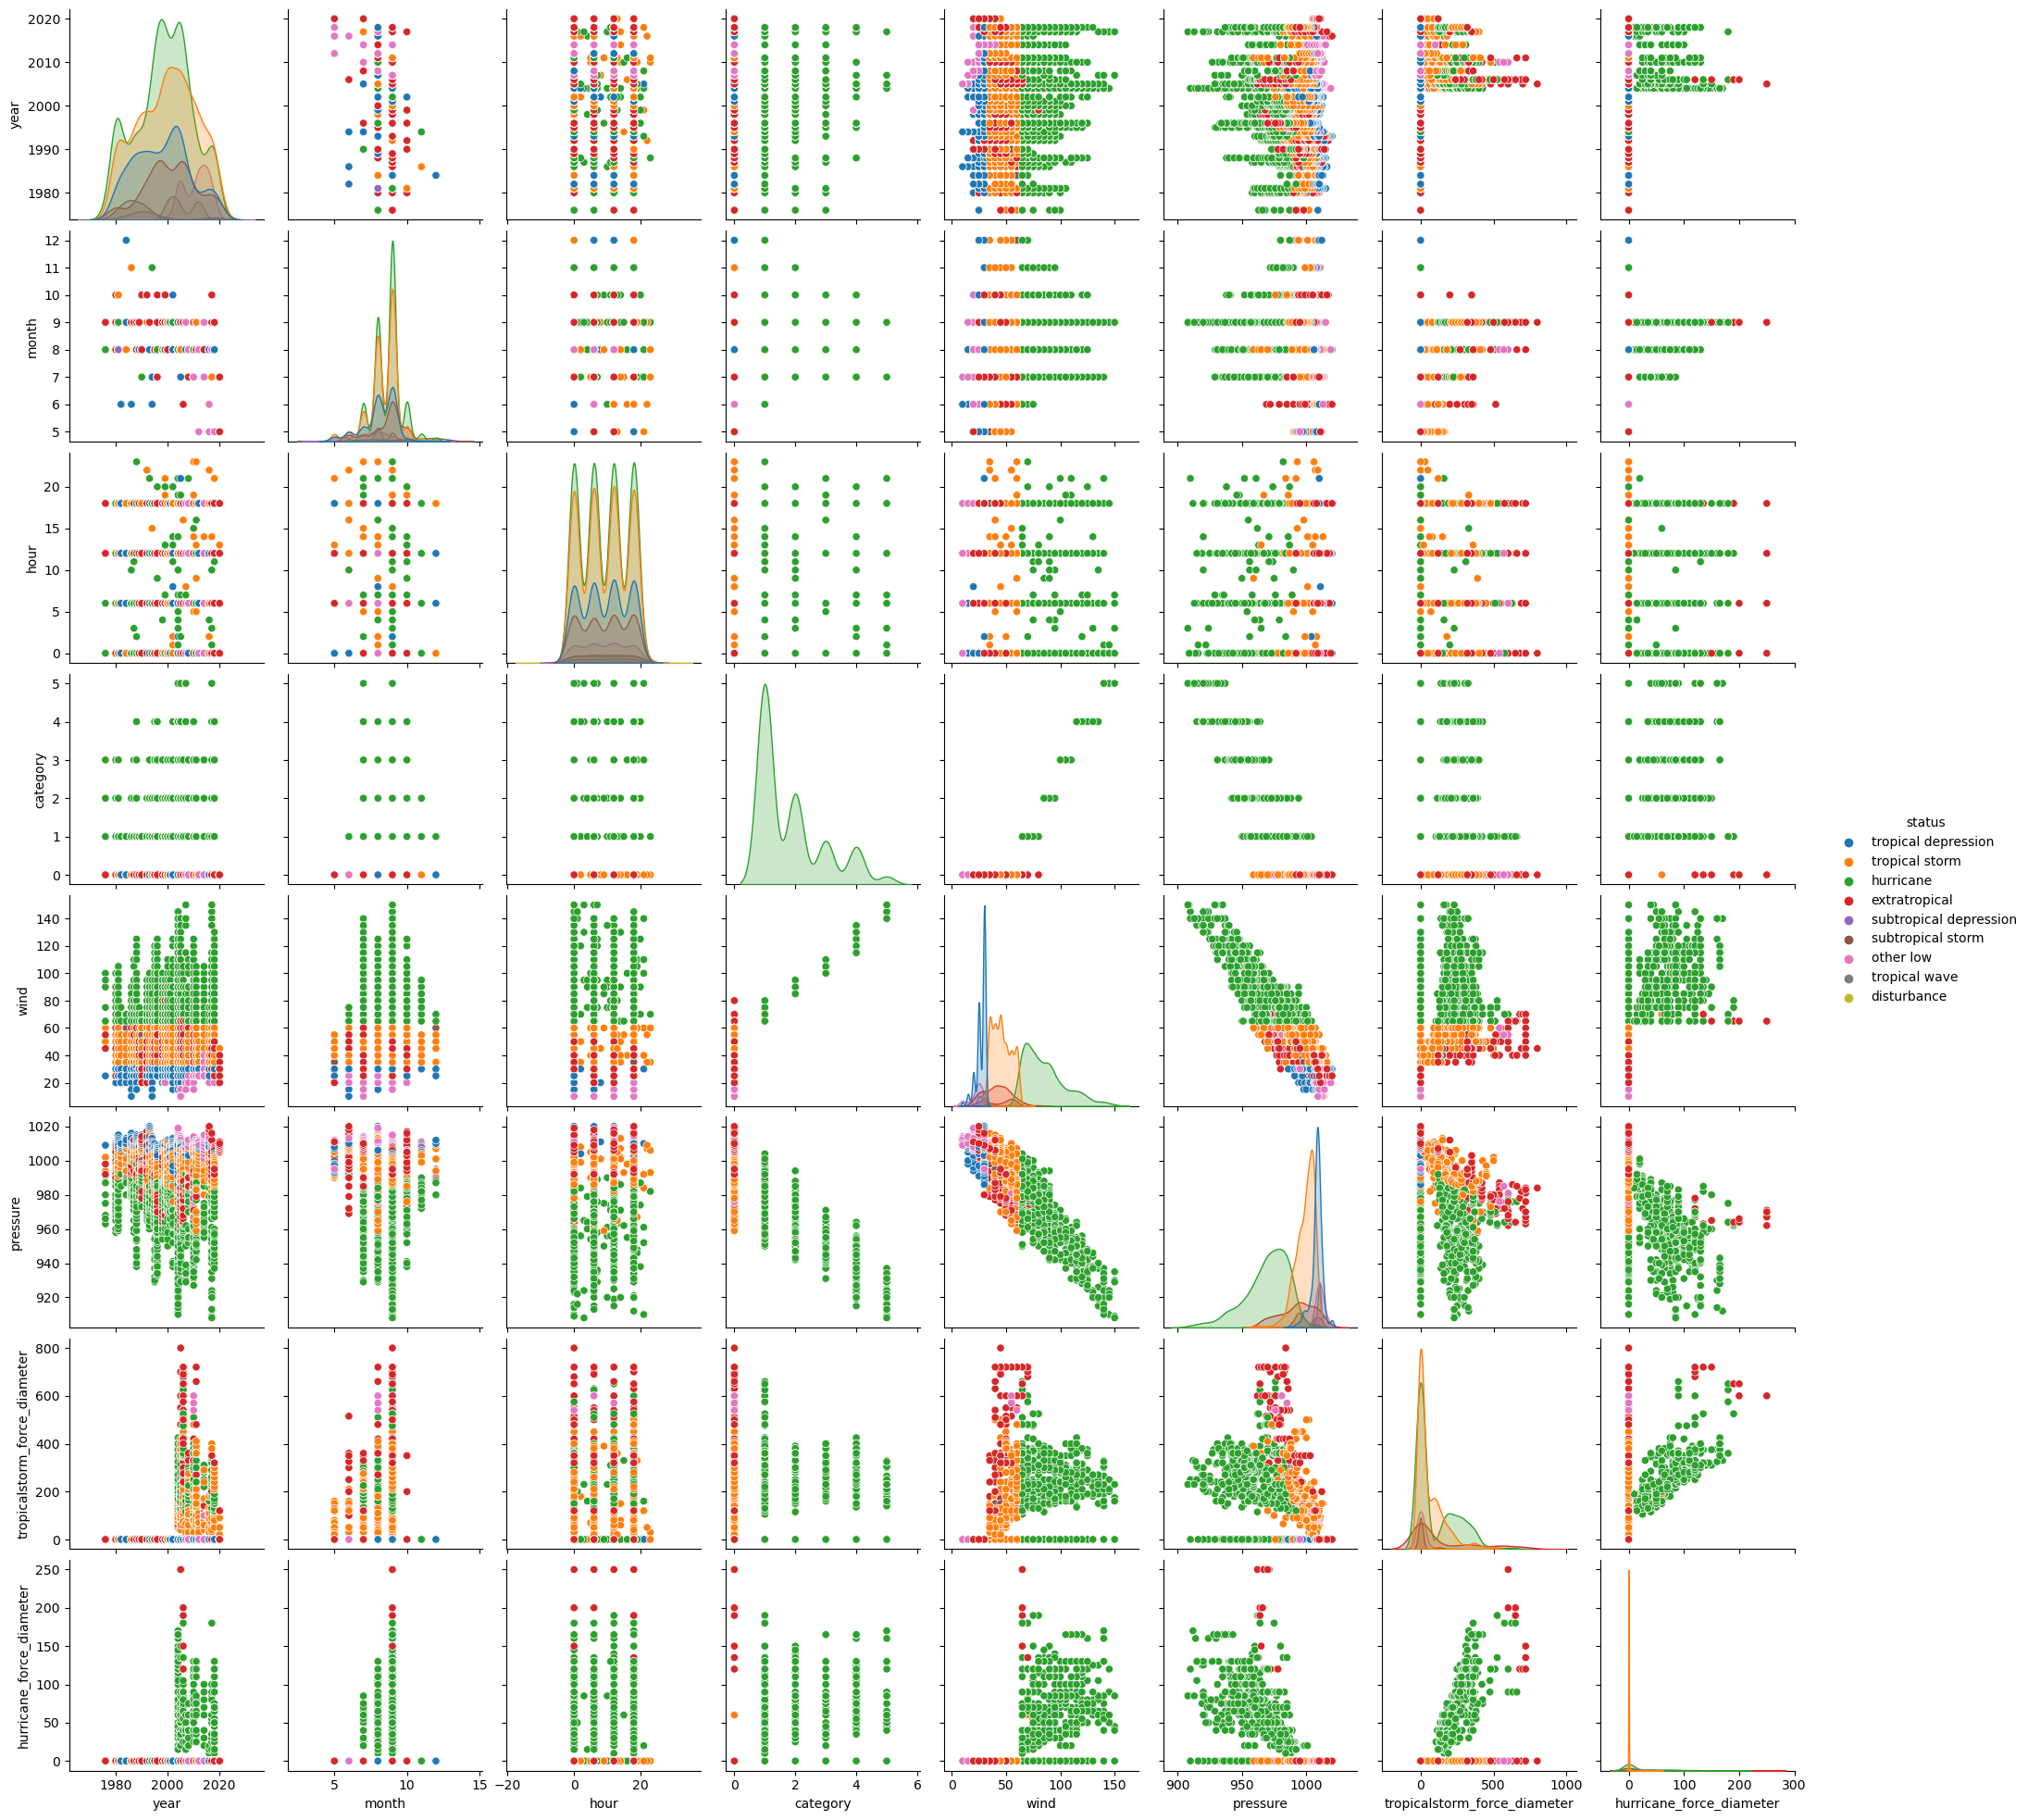

In [4]:
# basic pair plot, hue on status
sns.pairplot(df1, hue="status")

# we can see that hurricane is the mosr popular storm type
# hurricane has less pressure but more wind compared to others

# to be honest, this pair plot is a little bit difficult to read
# because I cannot see any clear positive correlation

<h4><b>seaborn plots - heatmaps</b></h4>

<Axes: xlabel='year', ylabel='month'>

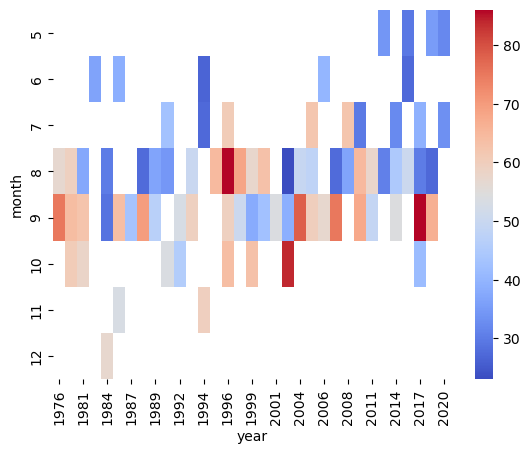

In [5]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='year', values='wind')
sns.heatmap(pt, cmap='coolwarm')

# we can see that wind was strong several times during all the perion
# we also can see that usually it was in August, September or October
# sosmetimes it started in July

<Axes: xlabel='year', ylabel='month'>

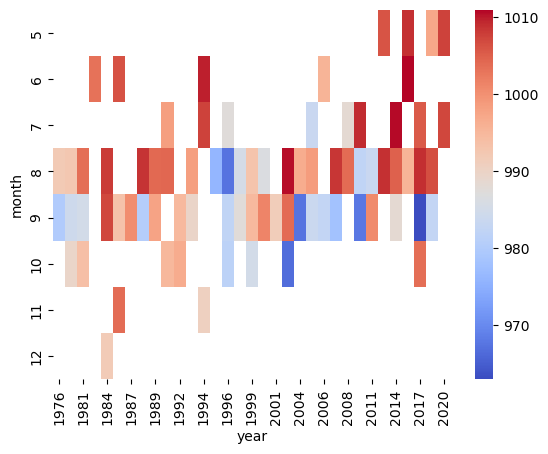

In [6]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='year', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

# we can see that high pressure starts form May and can contunie until Decemner
# but usually until October

<Axes: xlabel='hour', ylabel='month'>

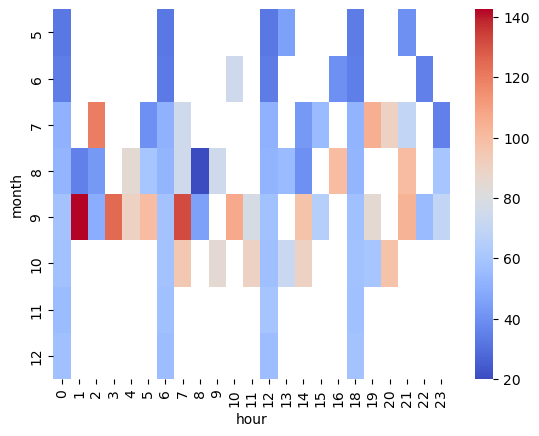

In [7]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='hour', values='wind')
sns.heatmap(pt, cmap='coolwarm')

# stronges wind is during nights in October
# but wind also can be very strong during a day in 

<Axes: xlabel='hour', ylabel='month'>

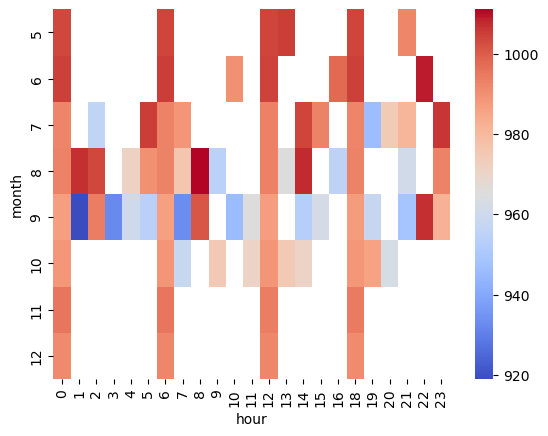

In [8]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='hour', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

# here we can see that pressure starts usually from May
# and during a day it repeats every 4-6 hours
# there is no month without high pressure

<h4><b>seaborn plots - regression plots</b></h4>

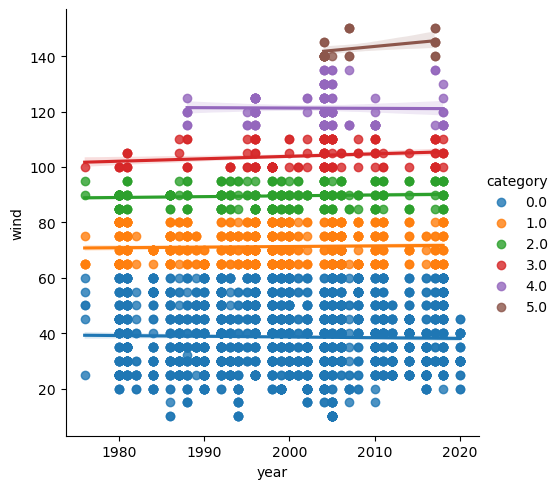

In [9]:
# regression plot for wind/year, hue on category
sns.lmplot(x='year', y='wind', data=df1, hue='category')

# note for myself from data description: 
# higher category -> higher wind speed
# here we can see that wind speed grew for the last decades
# from 1990 it became category 4, from 2005 category 5

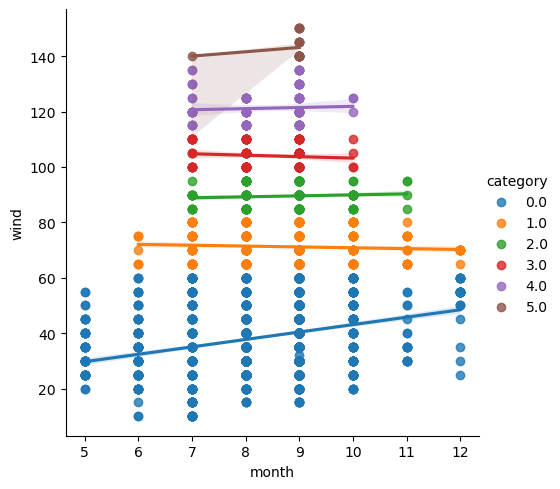

In [10]:
# regression plot for wind/month, hue on category
sns.lmplot(x='month', y='wind', data=df1, hue='category')

# highest category on July and September
# second place tajes August and October

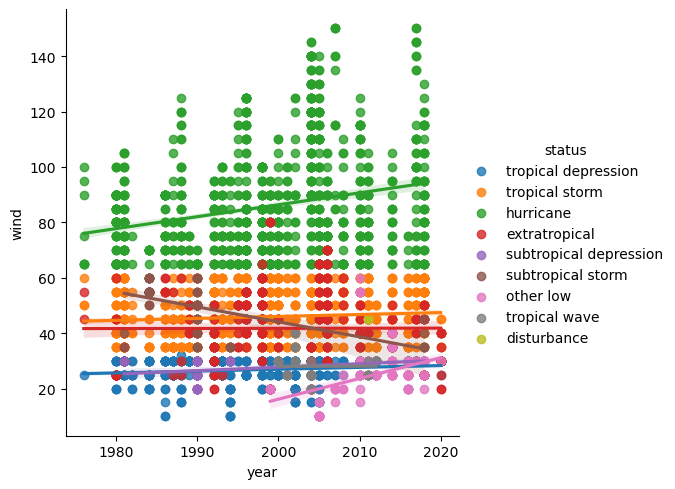

In [11]:
# regression plot for wind/year, hue on status
sns.lmplot( x='year', y='wind', data=df1, hue='status')

# the most powerful and dangerous storm
# is hurricane becuase of wind speed
# as we could see before, wind is becoming more dangerous decade by decade

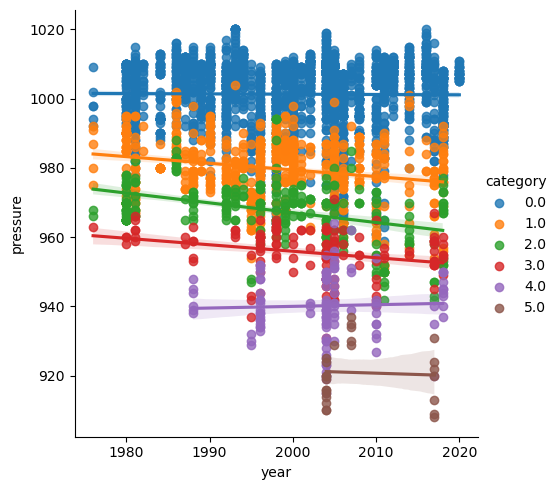

In [12]:
# regression plot for pressure/year, hue on category
sns.lmplot(x='year', y='pressure', data=df1, hue='category')

# this is a little surprise!
# I though when pressure is high -> category higher
# but here it is totally opposity

# after simple googling, As a storm approaches a particular area, the barometric pressure will lower. 
# In some sensitive people, body aches may be more severe due to the pressure change
# source: https://www.accuweather.com/en/weather-news/what-is-a-low-pressure-area/433451

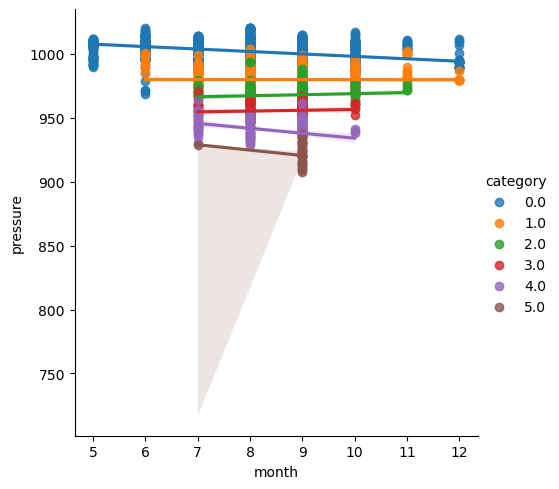

In [13]:
# regression plot for pressure/month, hue on category
sns.lmplot(x='month', y='pressure', data=df1, hue='category')

# pressure have the same "popular" months: Julu and September
# second place tajes August and October

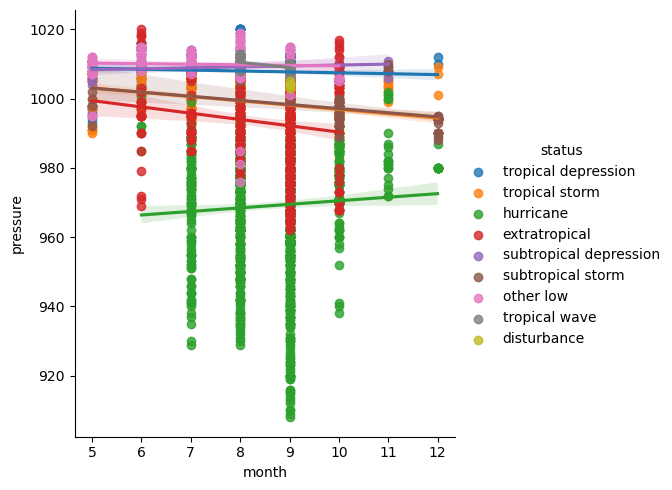

In [14]:
# regression plot for pressure_month, hue on status
sns.lmplot(x='month', y='pressure', data=df1, hue='status')

# here we also can see that hurricane
# is the most frequent storm

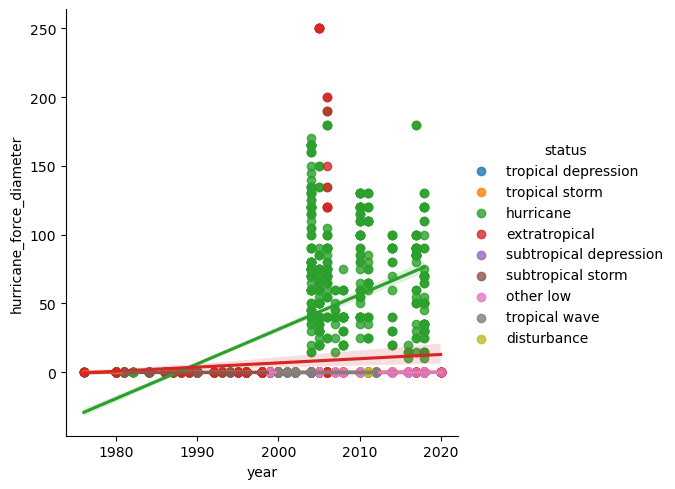

In [15]:
# regression plot for hurricane force diameter and year, hue on status
sns.lmplot(x='year', y='hurricane_force_diameter', data=df1, hue='status')

# I would rather to delete this plot becuase it can confuse
# we have data that only available starting in 2004
# it does not show the clear picture and does not give any insights

# I googled a little bit and could find that the strongest hurricane season ever
# was the 1780 Atlantic hurricane season that ran through the summer and fall in 1780. 
# The 1780 season was extraordinarily destructive, and was the deadliest Atlantic hurricane season 
# in recorded history, with over 28,000 deaths.
# source: https://en.wikipedia.org/wiki/1780_Atlantic_hurricane_season

# I think, it would be better to add info about deaths/damage to the dataset
# and also add info about 1970 year storms
# probably, we could see different picture (more like positive parabola)

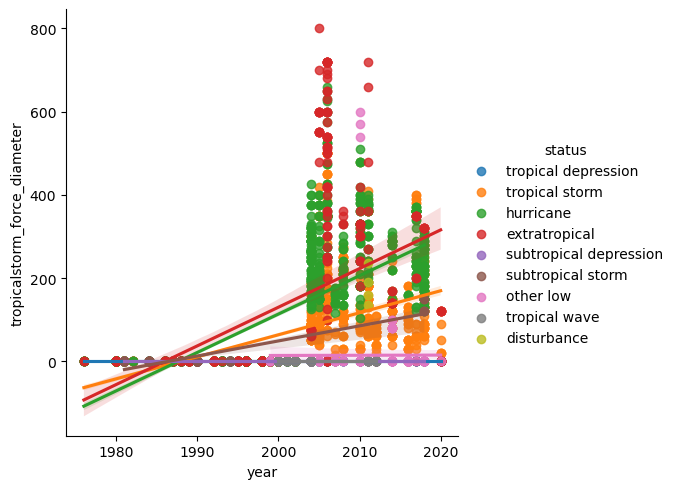

In [16]:
# regression plot for tropical storm diameter and year, hue on status
sns.lmplot(x='year', y='tropicalstorm_force_diameter', data=df1, hue='status')

# I would rather to delete this plot becuase it can confuse
# we have data that only available starting in 2004
# it does not show the clear picture and does not give any insights

<h4><b>seaborn plots - boxplots</b></h4>

<Axes: xlabel='category', ylabel='wind'>

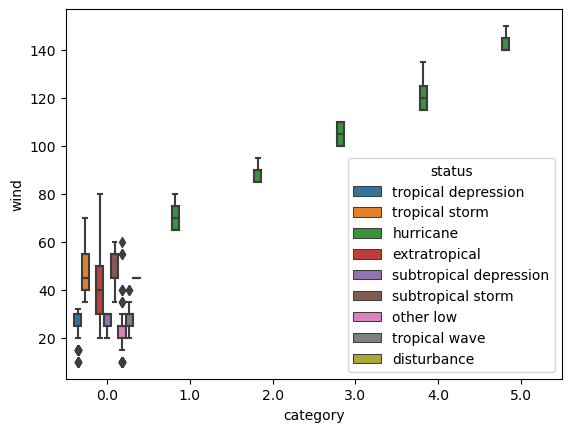

In [17]:
# boxplot, category/wind, hue on status
sns.boxplot(x='category', y='wind', data=df1, hue='status')

# here the same info as before
# hurricane has the strongest wind speed

<Axes: xlabel='category', ylabel='pressure'>

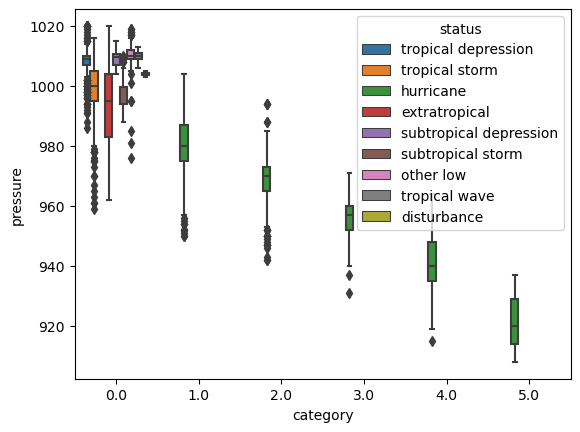

In [18]:
# boxplot, category/pressure, hue on status
sns.boxplot(x='category', y='pressure', data=df1, hue='status')

# here the same info as before
# hurricane has the lowest pressure

<Axes: xlabel='category', ylabel='hurricane_force_diameter'>

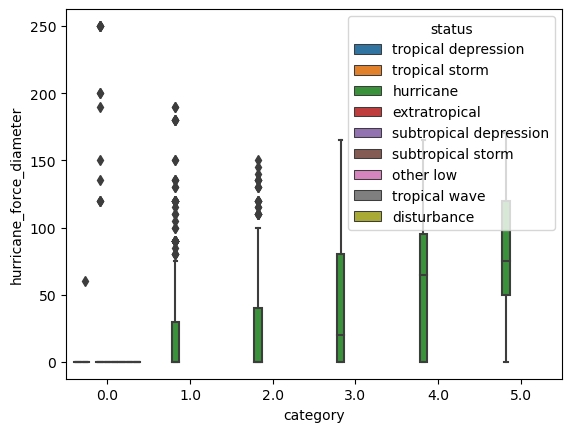

In [19]:
# boxplot, category/hurricane force diameter, hue on status
sns.boxplot(x='category', y='hurricane_force_diameter', data=df1, hue='status')

# here the same info as before
# hurricane has the bigger force diameter

<h4><b>seaborn plots - heatmaps for correlations matrices</b></h4>

<Axes: >

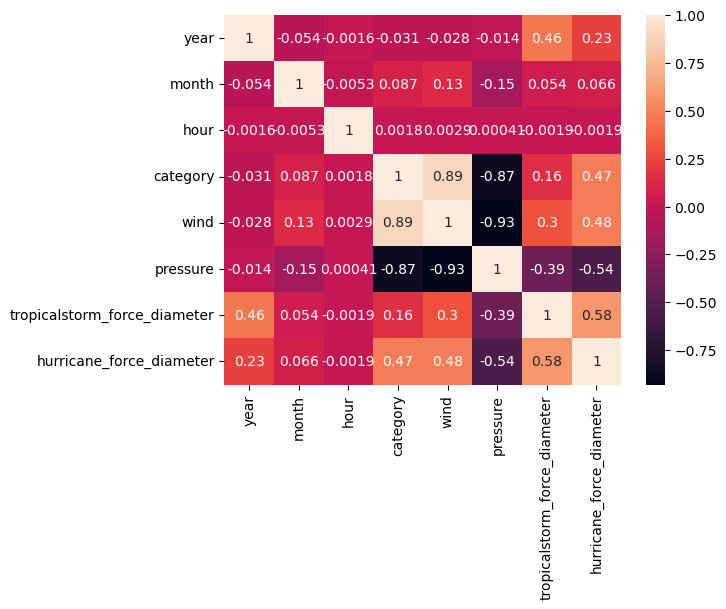

In [20]:
# correlation matrix heatmap, whole dataset
sns.heatmap(correlations, annot=True)

# actually, this is not useful correaltion matrix
# we can see some obvious correaltion such as
#  wind - category or wind - hurricane_force_diameter

# but we can one intersesting thing
# correlation between

<Axes: >

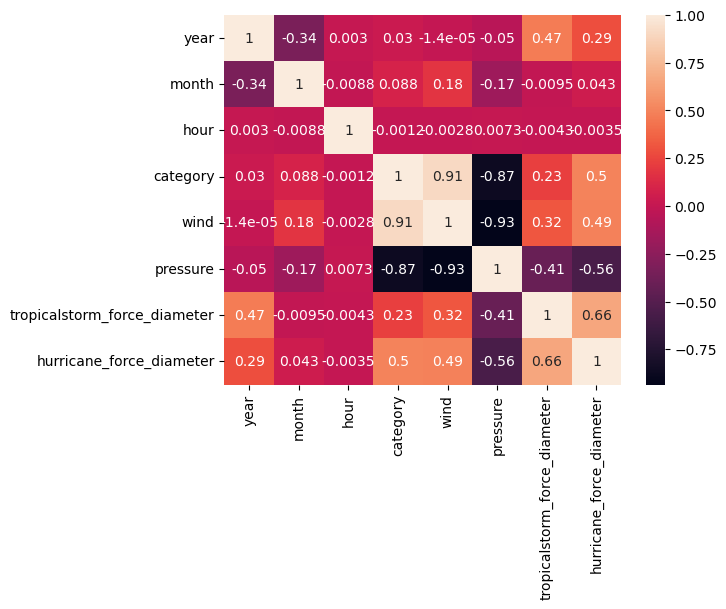

In [21]:
# correlation matrix heatmap for top hurricanes
sns.heatmap(correlations1, annot=True)